Greyscale ℓ1-TV Denoising
=========================

This example demonstrates the use of class [tvl1.TVL1Deconv](http://sporco.rtfd.org/en/latest/modules/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Deconv) for removing salt & pepper noise from a greyscale image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising). (This class is primarily intended for deconvolution problems, but can be applied to denoising problems by choosing an impulse filter as the blurring kernel.)

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import signal
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = signal.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV deconvolution solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 8e-1
opt = tvl1.TVL1Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'RelStopTol': 5e-3, 'gEvalY': False,
                               'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl1.TVL1Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ       
----------------------------------------------------------------


   0  4.69e+04  2.97e+04  2.15e+04  3.18e-01  2.76e-01  1.70e+00
   1  4.03e+04  2.95e+04  1.35e+04  2.47e-01  4.19e-01  1.70e+00
   2  6.51e+04  4.39e+04  2.64e+04  2.67e-01  4.06e-01  1.31e+00


   3  4.59e+04  3.08e+04  1.89e+04  2.35e-01  1.97e-01  1.06e+00
   4  4.48e+04  3.02e+04  1.82e+04  2.03e-01  2.44e-01  1.06e+00
   5  5.09e+04  3.55e+04  1.93e+04  1.90e-01  1.85e-01  9.67e-01


   6  4.29e+04  3.12e+04  1.45e+04  1.57e-01  1.44e-01  9.67e-01
   7  4.12e+04  2.97e+04  1.44e+04  1.34e-01  1.30e-01  9.67e-01
   8  4.18e+04  3.08e+04  1.37e+04  1.17e-01  1.13e-01  9.67e-01


   9  3.92e+04  2.97e+04  1.19e+04  9.93e-02  8.77e-02  9.67e-01
  10  3.81e+04  2.88e+04  1.17e+04  8.67e-02  7.93e-02  9.67e-01
  11  3.79e+04  2.93e+04  1.08e+04  7.50e-02  6.41e-02  9.67e-01


  12  3.67e+04  2.86e+04  1.01e+04  6.51e-02  5.83e-02  9.67e-01
  13  3.61e+04  2.83e+04  9.87e+03  5.74e-02  4.86e-02  9.67e-01
  14  3.58e+04  2.84e+04  9.23e+03  5.00e-02  4.02e-02  9.67e-01
  15  3.51e+04  2.81e+04  8.74e+03  4.21e-02  4.06e-02  1.08e+00


  16  3.49e+04  2.79e+04  8.71e+03  3.80e-02  3.28e-02  1.08e+00
  17  3.44e+04  2.78e+04  8.23e+03  3.31e-02  2.76e-02  1.08e+00
  18  3.43e+04  2.78e+04  8.13e+03  2.91e-02  2.79e-02  1.18e+00


  19  3.40e+04  2.76e+04  8.01e+03  2.63e-02  2.26e-02  1.18e+00
  20  3.38e+04  2.76e+04  7.81e+03  2.37e-02  1.98e-02  1.18e+00
  21  3.38e+04  2.76e+04  7.76e+03  2.18e-02  1.80e-02  1.18e+00


  22  3.36e+04  2.75e+04  7.63e+03  1.94e-02  1.71e-02  1.30e+00
  23  3.35e+04  2.75e+04  7.56e+03  1.80e-02  1.45e-02  1.30e+00
  24  3.34e+04  2.74e+04  7.47e+03  1.64e-02  1.46e-02  1.45e+00


  25  3.33e+04  2.74e+04  7.46e+03  1.54e-02  1.25e-02  1.45e+00
  26  3.33e+04  2.73e+04  7.39e+03  1.43e-02  1.26e-02  1.61e+00
  27  3.33e+04  2.74e+04  7.38e+03  1.36e-02  1.11e-02  1.61e+00


  28  3.32e+04  2.73e+04  7.34e+03  1.27e-02  1.14e-02  1.78e+00
  29  3.32e+04  2.73e+04  7.34e+03  1.21e-02  9.95e-03  1.78e+00
  30  3.31e+04  2.73e+04  7.31e+03  1.15e-02  1.03e-02  1.97e+00


  31  3.31e+04  2.73e+04  7.31e+03  1.10e-02  9.39e-03  1.97e+00
  32  3.31e+04  2.73e+04  7.30e+03  1.06e-02  9.01e-03  1.97e+00
  33  3.31e+04  2.73e+04  7.30e+03  1.02e-02  8.35e-03  1.97e+00


  34  3.31e+04  2.72e+04  7.29e+03  9.78e-03  8.62e-03  2.18e+00
  35  3.31e+04  2.72e+04  7.29e+03  9.44e-03  8.13e-03  2.18e+00
  36  3.30e+04  2.72e+04  7.28e+03  9.12e-03  7.70e-03  2.18e+00
  37  3.30e+04  2.72e+04  7.28e+03  8.82e-03  7.35e-03  2.18e+00


  38  3.30e+04  2.72e+04  7.28e+03  8.53e-03  7.07e-03  2.18e+00
  39  3.30e+04  2.72e+04  7.28e+03  8.20e-03  7.23e-03  2.39e+00
  40  3.30e+04  2.72e+04  7.28e+03  7.93e-03  6.94e-03  2.39e+00


  41  3.30e+04  2.72e+04  7.28e+03  7.68e-03  6.64e-03  2.39e+00
  42  3.30e+04  2.72e+04  7.28e+03  7.43e-03  6.42e-03  2.39e+00
  43  3.30e+04  2.72e+04  7.27e+03  7.20e-03  6.22e-03  2.39e+00


  44  3.30e+04  2.72e+04  7.27e+03  6.96e-03  5.95e-03  2.39e+00
  45  3.30e+04  2.72e+04  7.27e+03  6.74e-03  5.77e-03  2.39e+00
  46  3.30e+04  2.72e+04  7.27e+03  6.53e-03  5.54e-03  2.39e+00


  47  3.30e+04  2.72e+04  7.27e+03  6.32e-03  5.31e-03  2.39e+00
  48  3.30e+04  2.71e+04  7.27e+03  6.12e-03  5.13e-03  2.39e+00
  49  3.30e+04  2.71e+04  7.27e+03  5.93e-03  4.95e-03  2.39e+00


  50  3.30e+04  2.71e+04  7.26e+03  5.75e-03  4.74e-03  2.39e+00
  51  3.29e+04  2.71e+04  7.26e+03  5.53e-03  4.94e-03  2.64e+00
  52  3.29e+04  2.71e+04  7.26e+03  5.35e-03  4.77e-03  2.64e+00


  53  3.29e+04  2.71e+04  7.26e+03  5.18e-03  4.56e-03  2.64e+00
  54  3.29e+04  2.71e+04  7.26e+03  5.02e-03  4.44e-03  2.64e+00
  55  3.29e+04  2.71e+04  7.26e+03  4.86e-03  4.33e-03  2.64e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Deconv solve time:  9.50 s
Noisy image PSNR:    11.32 dB
Denoised image PSNR: 28.65 dB


Display reference, corrupted, and denoised images.

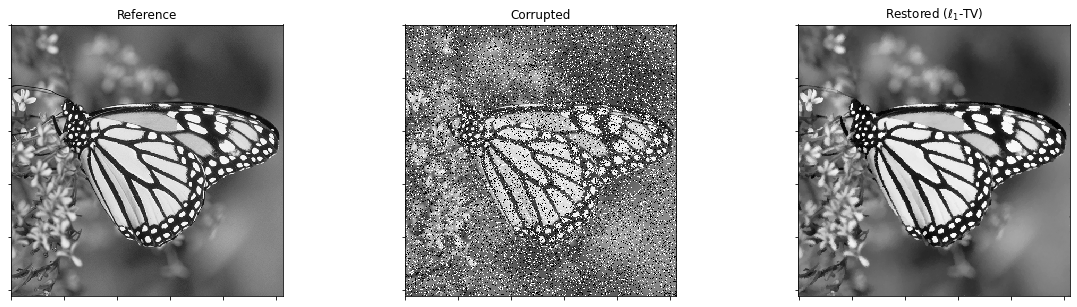

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

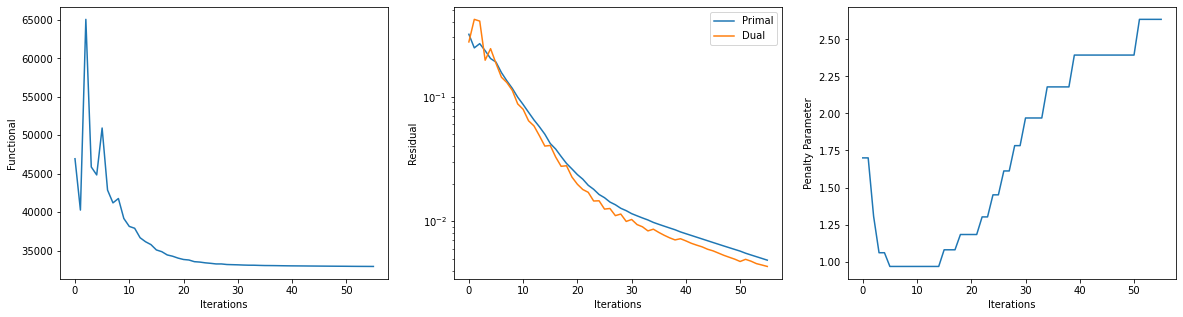

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()